In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df = pd.read_csv('/content/loan_approval_dataset.csv')
df_encoded = (pd.get_dummies(df,columns=['education','self_employed','loan_status'],drop_first=True)).astype(int)

X = df_encoded.drop(columns=['loan_status_Rejected'])
Y = df_encoded['loan_status_Rejected']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.8806


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       536
           1       0.83      0.86      0.84       318

    accuracy                           0.88       854
   macro avg       0.87      0.88      0.87       854
weighted avg       0.88      0.88      0.88       854



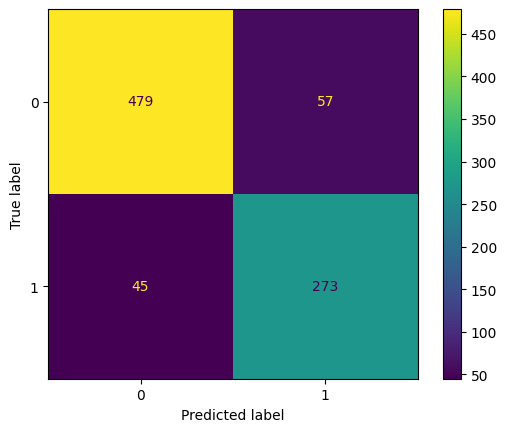

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()